In [1]:
#the model i use
from sklearn.ensemble import RandomForestRegressor
#the error metric
from sklearn.metrics import roc_auc_score
#pandas libery import
import pandas as pd


In [2]:
#import data file
x=pd.read_csv("titanic.csv")
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Survied column declear y
y=x.pop('Survived')
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
#data describe only numerical data
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
x.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#fill na age 
x['Age'].fillna(x.Age.mean(), inplace=True)

x.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#select numerical value
numerical_value=list(x.dtypes[x.dtypes!="object"].index)
x[numerical_value].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [8]:
#model read
model=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
#train only numerical data and survived
model.fit(x[numerical_value],y)

RandomForestRegressor(oob_score=True, random_state=42)

In [9]:
#R^2 based on prediction
# see the score
model.oob_score_

0.1361695005913669

In [10]:
#c stat score
y_oob=model.oob_prediction_
roc_auc_score(y,y_oob)

0.7399551550399983

In [11]:
#describe category 
def describe_categorical(x):
    from IPython.display import display,HTML
    display(HTML(x[x.columns[x.dtypes=="object"]].describe().to_html()))
    

describe_categorical(x)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",male,1601,G6,S
freq,1,577,7,4,644


In [12]:
#drop name,ticket,pressengerId
x.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,female,38.000000,1,0,71.2833,C85,C
2,3,female,26.000000,0,0,7.9250,NaN,S
3,1,female,35.000000,1,0,53.1000,C123,S
4,3,male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,NaN,S
887,1,female,19.000000,0,0,30.0000,B42,S
888,3,female,29.699118,1,2,23.4500,NaN,S
889,1,male,26.000000,0,0,30.0000,C148,C


In [13]:
#update sex cabin and embarked data
variables=['Sex','Cabin','Embarked']

for i in variables:
    dummies=pd.get_dummies(x[i],prefix=i)
    x=pd.concat([x,dummies],axis=1)
    x.drop([i],axis=1,inplace=True)

In [14]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#all columns print
def printall(x,max_rows=10):
    from IPython.display import display,HTML
    display(HTML(x.to_html(max_rows=max_rows)))
    
printall(x)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [16]:
#model read
model=RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
#train only numerical data and survived
model.fit(x,y)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [17]:
model.score(x,y)

0.8949735065837328

In [18]:
##c stat score
roc_auc_score(y,model.oob_prediction_)

0.8634492271967107

# variable importance measures

In [19]:
model.feature_importances_

array([1.00272332e-01, 2.12352942e-01, 4.59057321e-02, 1.93087113e-02,
       1.97863702e-01, 1.55537158e-01, 1.46708719e-01, 1.50181243e-04,
       0.00000000e+00, 0.00000000e+00, 6.96129788e-05, 1.29305957e-03,
       1.78922256e-03, 9.81455960e-05, 3.22101889e-03, 1.47162747e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69763794e-03, 0.00000000e+00, 1.54062162e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.24111766e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.11901855e-03, 0.00000000e+00, 2.43193051e-05,
       2.45824688e-03, 0.00000000e+00, 1.28994974e-03, 0.00000000e+00,
       1.42172098e-03, 5.03553631e-04, 0.00000000e+00, 9.51681987e-05,
       0.00000000e+00, 1.85324890e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55558242e-04,
       3.30460711e-04, 0.00000000e+00, 1.70630308e-03, 0.00000000e+00,
      

# parameter test

# n_job

In [20]:
%%timeit
model=RandomForestRegressor(1000, oob_score=True,n_jobs=-1, random_state=42)
model.fit(x,y)

3.02 s ± 683 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
model=RandomForestRegressor(1000, oob_score=True,n_jobs=1, random_state=42)
model.fit(x,y)

5.71 s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# n_estimators

trees 30
c-stat 0.8563043918235174

trees 50
c-stat 0.8612016531918746

trees 100
c-stat 0.8634492271967107

trees 200
c-stat 0.8631935789686724

trees 500
c-stat 0.8636462893724901

trees 1000
c-stat 0.86364628937249

trees 2000
c-stat 0.8639631866551626



<AxesSubplot:>

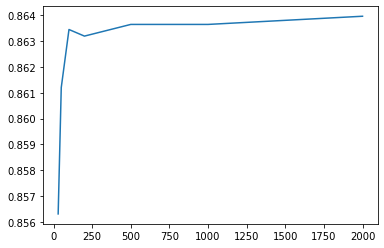

In [22]:
result=[]
n_estimator_option=[30,50,100,200,500,1000,2000]
for trees in n_estimator_option:
    model=RandomForestRegressor(trees, oob_score=True,n_jobs=1, random_state=42)
    model.fit(x,y)
    print("trees",trees)
    roc=roc_auc_score(y,model.oob_prediction_)
    print ("c-stat", roc)
    result.append(roc)
    print ("")
        
pd.Series(result,n_estimator_option).plot()

        

# max_features

max_feature auto
c-stat 0.86364628937249

max_feature None
c-stat 0.86364628937249

max_feature sqrt
c-stat 0.8619233268356075

max_feature log2
c-stat 0.865411859947379

max_feature 0.9
c-stat 0.8629086377145048

max_feature 0.2
c-stat 0.8647887173915358



<AxesSubplot:>

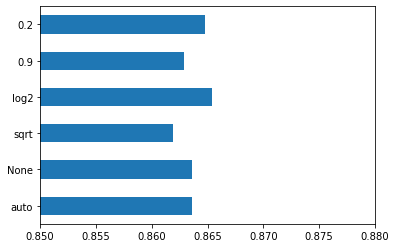

In [23]:
result=[]
max_feature_option=["auto",None,"sqrt","log2",0.9,0.2]
for max_feature in max_feature_option:
    model=RandomForestRegressor(1000, oob_score=True,n_jobs=1, random_state=42, max_features=max_feature)
    model.fit(x,y)
    print("max_feature",max_feature)
    roc=roc_auc_score(y,model.oob_prediction_)
    print ("c-stat", roc)
    result.append(roc)
    print ("")
        
pd.Series(result,max_feature_option).plot(kind="barh",xlim=(.85,.88))

# min_samples_leaf

min_samples 1
c-stat 0.86364628937249

min_samples 2
c-stat 0.8681121443560328

min_samples 3
c-stat 0.8719335527647291

min_samples 4
c-stat 0.8740160206222903

min_samples 5
c-stat 0.8745140020664898

min_samples 6
c-stat 0.8744980240522375

min_samples 7
c-stat 0.8736405372873592

min_samples 8
c-stat 0.8720427358621204

min_samples 9
c-stat 0.8701573301803385



<AxesSubplot:>

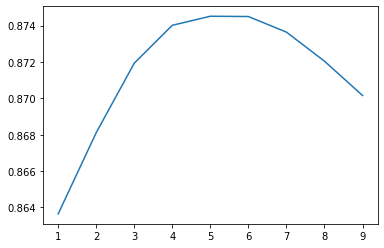

In [24]:
result=[]
min_samples_leaf_option=[1,2,3,4,5,6,7,8,9]
for min_samples in min_samples_leaf_option:
    model=RandomForestRegressor(1000, oob_score=True,n_jobs=1, random_state=42, max_features="auto",min_samples_leaf=min_samples)
    model.fit(x,y)
    print("min_samples",min_samples)
    roc=roc_auc_score(y,model.oob_prediction_)
    print ("c-stat", roc)
    result.append(roc)
    print ("")
        
pd.Series(result,min_samples_leaf_option).plot()

# final_model

In [25]:
model=RandomForestRegressor(1000, oob_score=True,n_jobs=-1, random_state=42, max_features="auto",min_samples_leaf=5)
model.fit(x,y)
roc=roc_auc_score(y,model.oob_prediction_)
print ("c-stat", roc)
result.append(roc)

c-stat 0.8745140020664898
